Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


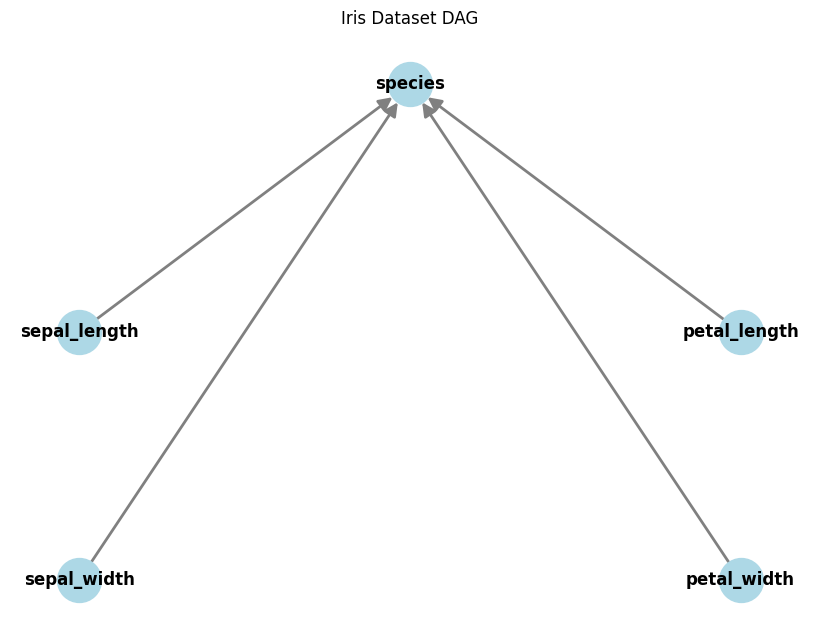

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a DAG
G = nx.DiGraph()

# Define the nodes (variables)
variables = [
    "sepal_length", "sepal_width",
    "petal_length", "petal_width",
    "species"  # Target variable
]

# Add nodes to the DAG
G.add_nodes_from(variables)

# Define the edges (conditional dependencies)
edges = [
    ("sepal_length", "species"),
    ("sepal_width", "species"),
    ("petal_length", "species"),
    ("petal_width", "species")
]

# Add edges to the DAG
G.add_edges_from(edges)

# Improved positions for better visualization
pos = {
    "sepal_length": (0, 1),
    "sepal_width": (0, 0),
    "petal_length": (1, 1),
    "petal_width": (1, 0),
    "species": (0.5, 2)
}

# Draw the DAG with improved settings
plt.figure(figsize=(8, 6))  # Set a larger figure size
options = {
    "node_color": "lightblue",
    "node_size": 1000,
    "font_size": 12,
    "font_color": "black",
    "font_weight": "bold",
    "edge_color": "gray",
    "width": 2,
    "arrows": True,
    "arrowsize": 20,
}
nx.draw(G, pos, with_labels=True, **options)
plt.title("Iris Dataset DAG")
plt.axis('off')  # Turn off the axis
plt.show()



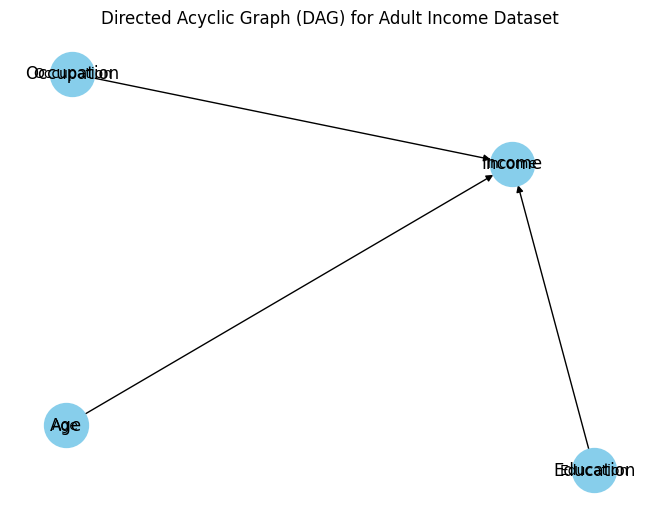

In [2]:
# Create a directed acyclic graph (DAG)
G = nx.DiGraph()

# Define the nodes and edges in your DAG based on the relationships between variables in the dataset
G.add_node("Age")
G.add_node("Education")
G.add_node("Occupation")
G.add_node("Income")
G.add_edge("Age", "Income")
G.add_edge("Education", "Income")
G.add_edge("Occupation", "Income")

# Draw the DAG
pos = nx.spring_layout(G)  # You can choose different layouts for visualization
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue")
labels = {"Age": "Age", "Education": "Education", "Occupation": "Occupation", "Income": "Income"}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)
plt.title("Directed Acyclic Graph (DAG) for Adult Income Dataset")
plt.show()


In [10]:
import dowhy
import pandas as pd

# Load the Adult Income dataset or your own dataset
# Replace 'adult_income.csv' with the actual dataset path
data = pd.read_csv('/Users/fabian/Desktop/datasets/adult.csv')

# Create a DoWhy model
model = dowhy.CausalModel(
    data=data,
    treatment='education',    # The variable you want to test the causal effect of
    outcome='income',        # The outcome variable
    common_causes=['age', 'occupation', 'marital_status', 'gender']  # Other relevant variables
)

# Identify causal effect
identified_estimand = model.identify_effect()

# Estimate causal effect using linear regression
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Visualize the DAG
dowhy.plotter.plot_model(model, view=True)  # Set view=True to view the DAG


/Users/fabian/anaconda3/envs/ex01/lib/python3.9/site-packages/dowhy/causal_model.py:557: UserWarning: 1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.
  warnings.warn(


TypeError: __init__() missing 1 required positional argument: 'realized_estimand_expr'